# House prices advances regression techniques contest from Kaggle

### In this jupyter notebook I will make classical linear regression using machine-learning libs (mainly sklearn) to  measure precision and metrics in order to compare results with my non machine-learning lib worksheet.

## Analytic approach with data collection section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

from scipy.stats import norm, skew, probplot

%matplotlib inline

In [2]:
data_train = pd.read_csv('./data/train.csv')

In [3]:
data_test = pd.read_csv('./data/test.csv')

In [4]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [8]:
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
data_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [10]:
# get the matrix shape from train set.
data_train.shape

(1460, 81)

In [11]:
# get the matrix shape from test set.
data_test.shape

(1459, 80)

### Pre-preprocessing data visualization

Text(0.5, 0, 'Sale price in dollars')

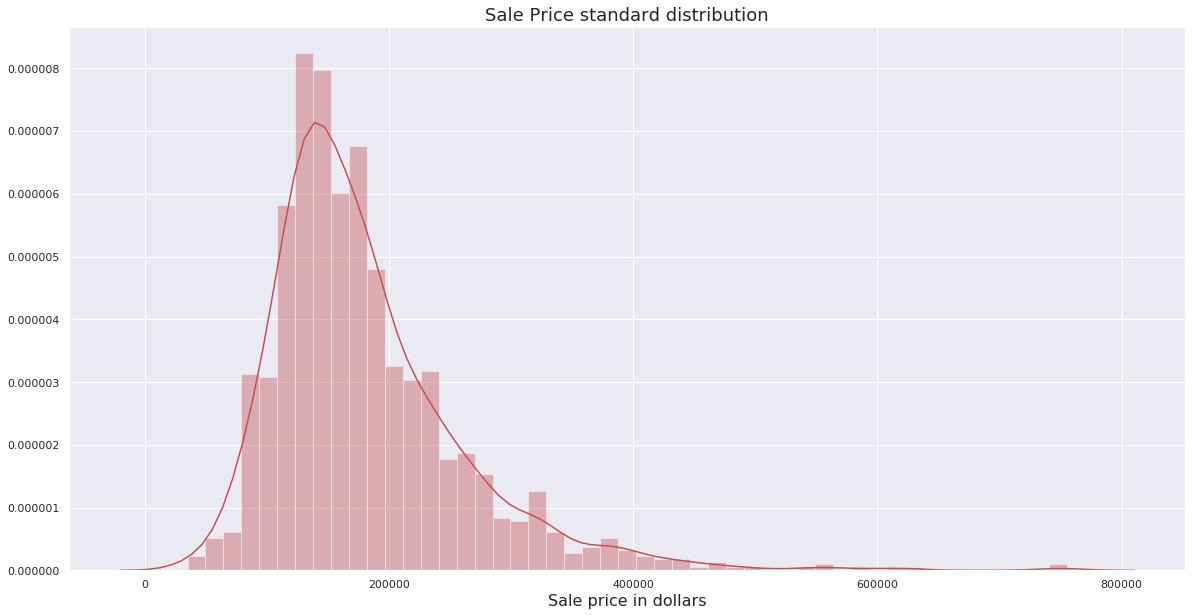

In [12]:
sns.set()
plt.figure(figsize=(20, 10))
plt.title('Sale Price standard distribution', size=18)
sns.distplot(data_train['SalePrice'], color='r')
plt.xlabel('Sale price in dollars', size=16)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5]), <a list of 38 Text yticklabel objects>)

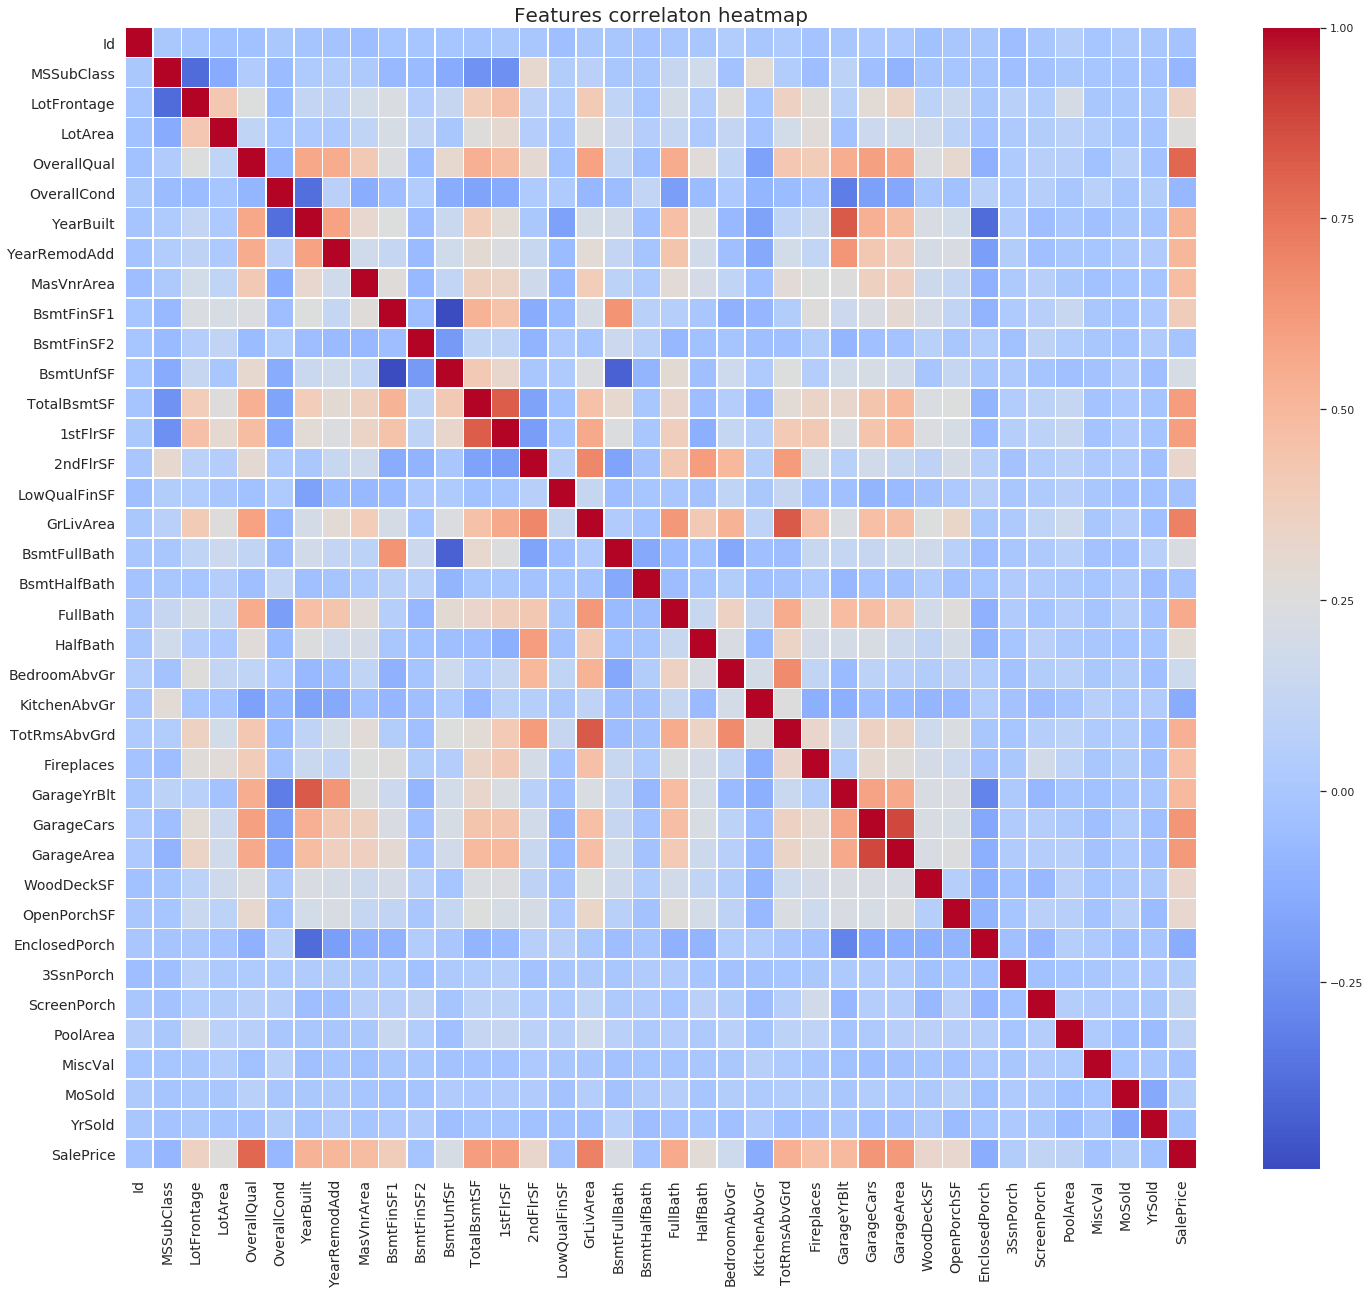

In [13]:
plt.figure(figsize=(24,21))
sns.heatmap(data_train.corr(), linewidths=.5, cmap='coolwarm')
plt.title('Features correlaton heatmap', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

_Note: Correlates in heatmap include only numerical features_

## Data Preprocessing

In [14]:
# remove cols that has more nan placeholders than 80% of column length

for column in data_train.columns:
     if data_train[column].isna().sum() > data_train.shape[0] * 0.2:
        data_train.drop(column, axis=1, inplace=True)
        data_test.drop(column, axis=1, inplace=True)

In [15]:
# replace nan values with propagate last valid observation forward to next valid

data_train.fillna(method='ffill', inplace=True)
data_test.fillna(method='ffill', inplace=True)

In [ ]:
# delete not correlated columns

for column in data_train.columns:
    if data_train[column].dtypes == 'object':
        continue
    else:
        if data_train['SalePrice'].corr(data_train[column]) <= 0:
            data_train.drop(column, inplace=True, axis=1)
            data_test.drop(column, inplace=True, axis=1)


 mu = 180921.20 and sigma = 79415.29



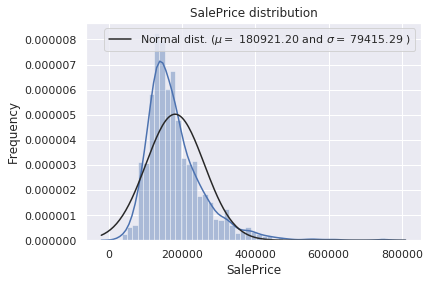

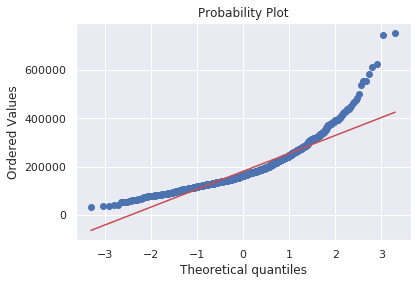

In [16]:
def show_distribution(saleprice):
    #Check the new distribution 
    sns.distplot(saleprice , fit=norm);

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(saleprice)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
    plt.ylabel('Frequency')
    plt.title('SalePrice distribution')

    #Get also the QQ-plot
    fig = plt.figure()
    res = probplot(saleprice, plot=plt)
    plt.show()

show_distribution(data_train['SalePrice'])

_Remove skewness to make more normal distributed SalePrice data._


 mu = 12.02 and sigma = 0.40



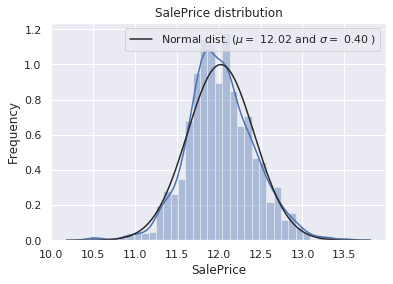

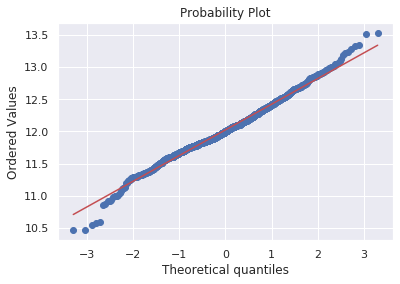

In [17]:
data_train["SalePrice"] = np.log1p(data_train["SalePrice"])
show_distribution(data_train['SalePrice'])

## Modeling

In [18]:
X_train = data_train.drop('SalePrice', axis=1)
X_test = data_test
y_train = data_train['SalePrice']

In [19]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(1460, 271)
(1459, 255)
(1460,)


In [21]:
# select best cv variable

best_cv = {'cv' : 0,
            'mean': 0,
            'std': 10000}

for cv in range(2, 20):
    scores = cross_val_score(LassoCV(cv=cv), X_train, y_train, cv=cv)
    
    mean = np.round(scores.mean(), 2)
    std = np.round(scores.std() * 2, 2)
    
    print("CV no. : {} -> Accuracy: {} (+/- {})".format(cv, mean, std))
    
    if mean > best_cv['mean']:
        best_cv['mean'] = mean
        best_cv['std'] = std
        best_cv['cv'] = cv
        
    elif mean == best_cv['mean']:
        if std < best_cv['std']:
            best_cv['mean'] = mean
            best_cv['std'] = std
            best_cv['cv'] = cv
            
print("Best CV number is {}".format(best_cv['cv']))

CV no. : 2 -> Accuracy: 0.73 (+/- 0.13)
CV no. : 3 -> Accuracy: 0.74 (+/- 0.15)
CV no. : 4 -> Accuracy: 0.74 (+/- 0.18)
CV no. : 5 -> Accuracy: 0.74 (+/- 0.21)
CV no. : 6 -> Accuracy: 0.74 (+/- 0.25)
CV no. : 7 -> Accuracy: 0.74 (+/- 0.26)
CV no. : 8 -> Accuracy: 0.75 (+/- 0.27)
CV no. : 9 -> Accuracy: 0.74 (+/- 0.28)
CV no. : 10 -> Accuracy: 0.74 (+/- 0.38)
CV no. : 11 -> Accuracy: 0.74 (+/- 0.41)
CV no. : 12 -> Accuracy: 0.74 (+/- 0.39)
CV no. : 13 -> Accuracy: 0.74 (+/- 0.39)
CV no. : 14 -> Accuracy: 0.74 (+/- 0.4)
CV no. : 15 -> Accuracy: 0.75 (+/- 0.39)
CV no. : 16 -> Accuracy: 0.74 (+/- 0.42)
CV no. : 17 -> Accuracy: 0.75 (+/- 0.39)
CV no. : 18 -> Accuracy: 0.75 (+/- 0.37)
CV no. : 19 -> Accuracy: 0.72 (+/- 0.67)
Best CV number is 8


In [22]:
kfolds = KFold(n_splits=best_cv['cv'], shuffle=True, random_state=42)

In [23]:
#lm = make_pipeline(RobustScaler(), LassoCV(max_iter=10000, random_state=42, cv=kfolds))
lm = LassoCV(max_iter=10000, random_state=42, cv=kfolds)

In [24]:
X_train.drop(X_train.drop(X_test, axis=1), axis=1, inplace=True)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(1460, 255)
(1459, 255)
(1460,)


In [27]:
def scale(dataset):
    dataset = RobustScaler().fit(dataset).transform(dataset)
    return pd.DataFrame(dataset)

In [28]:
X_train = scale(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,-1.000000,0.2,-0.238095,-0.254076,0.5,0.0,0.652174,0.243243,1.186082,0.452790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.998629,-0.6,0.476190,0.030015,0.0,3.0,0.065217,-0.486486,0.000000,0.834679,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.997258,0.2,-0.095238,0.437624,0.5,0.0,0.608696,0.216216,0.980333,0.143910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.995888,0.4,-0.476190,0.017663,0.5,0.0,-1.260870,-0.648649,0.000000,-0.235170,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0
4,-0.994517,0.2,0.666667,1.181201,1.0,0.0,0.586957,0.162162,2.118003,0.381186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
X_test = scale(X_test)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,-1.000000,-0.6,0.571429,0.538713,-0.5,1.0,-0.250000,-0.756098,0.000000,0.156915,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.998628,-0.6,0.619048,1.179692,0.0,1.0,-0.312500,-0.829268,0.652568,0.761968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.997257,0.2,0.285714,1.073791,-0.5,0.0,0.500000,0.146341,0.000000,0.586436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.995885,0.2,0.476190,0.140313,0.0,1.0,0.520833,0.146341,0.120846,0.335106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.994513,1.4,-1.190476,-1.064825,1.0,0.0,0.395833,0.000000,0.000000,-0.115691,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Evaluation

In [30]:
lm.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True,
        cv=KFold(n_splits=8, random_state=42, shuffle=True), eps=0.001,
        fit_intercept=True, max_iter=10000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=42,
        selection='cyclic', tol=0.0001, verbose=False)

In [31]:
print('Intercept: \n', lm.intercept_)
print('Slopes: \n', lm.coef_)

Intercept: 
 12.001883706479756
Slopes: 
 [-0.00000000e+00 -1.95410410e-02 -1.51743708e-04  8.12269286e-03
  1.67830674e-01  4.53376273e-02  9.84800872e-02  2.67218834e-02
  1.39398049e-04  6.73743295e-03  1.54283515e-05 -0.00000000e+00
  3.17550705e-02  0.00000000e+00  0.00000000e+00 -4.76759726e-05
  1.29269321e-01  3.39354276e-02  0.00000000e+00  4.55729478e-03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  1.81259524e-02
  3.86175522e-02  0.00000000e+00  6.79190210e-02  8.02037018e-03
  1.73633204e-02  0.00000000e+00  1.24127014e-04  2.29184787e-04
  3.68575420e-04 -3.06397733e-04 -6.02241933e-06  0.00000000e+00
 -4.47239132e-03 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  1.34848040e-02 -4.28049195e-02 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00

## Deployment

In [32]:
predictions_train = pd.DataFrame(lm.predict(X_train))
predictions_train.head()

,0
0,12.246257
1,12.134634
2,12.293978
3,12.072107
4,12.601017


In [33]:
predictions_test = pd.DataFrame(lm.predict(X_test))
#predictions_test = RobustScaler().fit(predictions_test).inverse_transform(predictions_test)
predictions_test = pd.DataFrame(np.expm1(predictions_test))

predictions_test.head()

,0
0,122374.369130
1,143468.473624
2,176542.562500
3,209231.215547
4,205514.856860


In [34]:
#predictions_test.to_csv('submission.csv')

## Feedback

In [35]:
results = pd.DataFrame(y_train).join(predictions_train)
results.rename(columns={"SalePrice": "Labels", 0: "Fitted"}, inplace=True)
results.head()

,Labels,Fitted
0,12.247699,12.246257
1,12.109016,12.134634
2,12.317171,12.293978
3,11.849405,12.072107
4,12.429220,12.601017


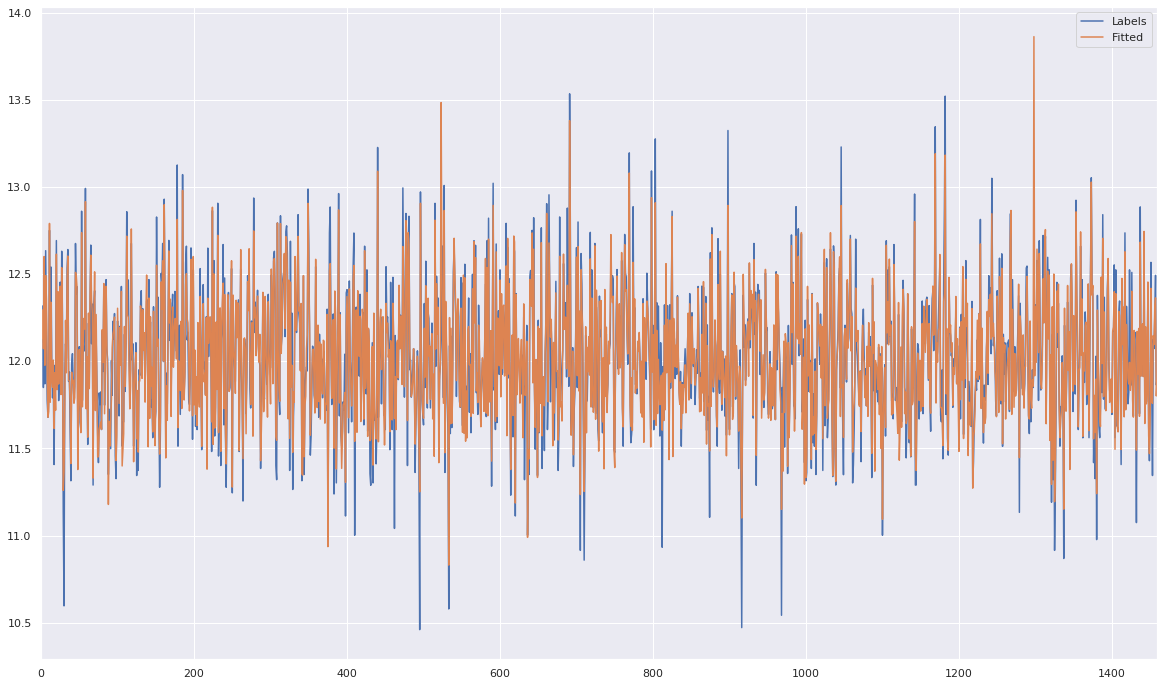

In [36]:
results.plot(figsize=(20,12))

In [37]:
print('R-squared score of predictions:', lm.score(X_train, y_train))

R-squared score of predictions: 0.8777864152749502
